In [3]:
import sys
sys.path.append('..')
from MPRA_predict.utils import *

In [4]:
# subprocess.run(
#     ['python', 'predict_epi_features/0_predict_epi_feature.py', 
#     '-i', 'data/Zhang_MPRA/Zhang_MPRA_final_200bp.csv', 
#     '-o', 'predict_epi_features/outputs/Zhang_MPRA_final_200bp_Sei_pred.h5',
#     '-m', 'Sei', 
#     '-d', 'cuda:0'],
#     cwd='..'
# )

In [5]:
metadata = pd.read_csv('../data/AlphaGenome/AlphaGenome_metadata.csv')

metadata['cell_type'] = metadata['biosample_name']
metadata['assay'] = pd.NA

mask = (metadata['Assay title'] == 'ATAC-seq')
metadata.loc[mask, 'assay'] = 'ATAC'
mask = (metadata['Assay title'] == 'DNase-seq')
metadata.loc[mask, 'assay'] = 'DNase'
mask = (metadata['Assay title'] == 'total RNA-seq')
metadata.loc[mask, 'assay'] = 'RNA-seq'
mask = (metadata['Assay title'] == 'hCAGE')
metadata.loc[mask, 'assay'] = 'CAGE'
mask = (metadata['Assay title'] == 'TF ChIP-seq')
metadata.loc[mask, 'assay'] = metadata.loc[mask, 'transcription_factor']
mask = (metadata['Assay title'] == 'Histone ChIP-seq')
metadata.loc[mask, 'assay'] = metadata.loc[mask, 'histone_mark']

metadata['index'] = metadata.index

metadata = metadata[(metadata['genetically_modified'] == False)| (pd.isna(metadata['genetically_modified']))]
metadata

,name,strand,Assay title,ontology_curie,biosample_name,biosample_type,biosample_life_stage,data_source,endedness,genetically_modified,output_type,gtex_tissue,histone_mark,transcription_factor,cell_type,assay,index
0,CL:0000084 ATAC-seq,.,ATAC-seq,CL:0000084,T-cell,primary_cell,adult,encode,paired,False,OutputType.ATAC,NaN,NaN,NaN,T-cell,ATAC,0
1,CL:0000100 ATAC-seq,.,ATAC-seq,CL:0000100,motor neuron,in_vitro_differentiated_cells,adult,encode,paired,False,OutputType.ATAC,NaN,NaN,NaN,motor neuron,ATAC,1
2,CL:0000236 ATAC-seq,.,ATAC-seq,CL:0000236,B cell,primary_cell,adult,encode,paired,False,OutputType.ATAC,NaN,NaN,NaN,B cell,ATAC,2
3,CL:0000623 ATAC-seq,.,ATAC-seq,CL:0000623,natural killer cell,primary_cell,adult,encode,paired,False,OutputType.ATAC,NaN,NaN,NaN,natural killer cell,ATAC,3
4,CL:0000624 ATAC-seq,.,ATAC-seq,CL:0000624,"CD4-positive, alpha-beta T cell",primary_cell,adult,encode,paired,False,OutputType.ATAC,NaN,NaN,NaN,"CD4-positive, alpha-beta T cell",ATAC,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5558,ENCSR182QNJ,-,PRO-cap,EFO:0001099,Caco-2,cell_line,NaN,encode,NaN,False,OutputType.PROCAP,NaN,NaN,NaN,Caco-2,<NA>,5558
5559,ENCSR740IPL,-,PRO-cap,EFO:0002067,K562,cell_line,NaN,encode,NaN,False,OutputType.PROCAP,NaN,NaN,NaN,K562,<NA>,5559
5560,ENCSR797DEF,-,PRO-cap,EFO:0002819,Calu3,cell_line,NaN,encode,NaN,False,OutputType.PROCAP,NaN,NaN,NaN,Calu3,<NA>,5560
5561,ENCSR801ECP,-,PRO-cap,CL:0002618,endothelial cell of umbilical vein,primary_cell,NaN,encode,NaN,False,OutputType.PROCAP,NaN,NaN,NaN,endothelial cell of umbilical vein,<NA>,5561


In [6]:
df_pivot = metadata.pivot_table(
    values="index", 
    index="cell_type", 
    columns="assay", 
    aggfunc=list,
)
# df_pivot = df_pivot.map(lambda x: x if isinstance(x, list) else [])
df_pivot

assay,AFF1,AGO1,AGO2,ARID1B,ARID3A,ARNT,ASH1L,ASH2L,ATAC,ATF1,ATF2,ATF3,ATF4,ATF7,BACH1,BATF,BCL11A,BCL3,BCLAF1,BCOR,BHLHE40,BMI1,BRCA1,BRD4,BRD9,BRF2,C11orf30,CAGE,CBFA2T2,CBFA2T3,CBFB,CBX1,CBX3,CBX5,CC2D1A,CEBPB,CHAMP1,CHD1,CHD2,CHD4,CLOCK,COPS2,CREB1,CREB3L1,CREM,CTBP1,CTBP2,CTCF,CUX1,Cebpa,DACH1,DDX20,DEAF1,DNase,DPF2,E2F1,E2F4,E2F6,E2F8,E4F1,EBF1,EED,EGR1,EHMT2,ELF1,ELF4,ELK1,ELK4,EP300,EP400,ESRRA,ETS1,ETV4,ETV6,EZH2,EZH2phosphoT487,FOS,FOSL1,FOSL2,FOXA1,FOXA2,FOXK2,FOXM1,FUS,GABPA,GABPB1,GATA1,GATA2,GATA3,GATA4,GATAD2A,GATAD2B,GMEB1,GTF2F1,H2AFZ,H2AK5ac,H2BK120ac,H2BK12ac,H2BK15ac,H2BK20ac,H2BK5ac,H3F3A,H3K14ac,H3K18ac,H3K23ac,H3K27ac,H3K27me3,H3K36me3,H3K4ac,H3K4me1,H3K4me2,H3K4me3,H3K56ac,H3K79me1,H3K79me2,H3K9ac,H3K9me1,H3K9me2,H3K9me3,H4K20me1,H4K5ac,H4K8ac,H4K91ac,HCFC1,HDAC1,HDAC2,HDAC3,HDGF,HES1,HLTF,HMBOX1,HNF1A,HNF4A,HNF4G,HNRNPL,IKZF1,IKZF2,IRF2,IRF4,JUN,JUNB,JUND,KDM1A,KDM4B,KDM5A,KLF16,KLF5,L3MBTL2,LARP7,LEF1,MAFF,MAFK,MAX,MAZ,MBD2,MCM5,MEF2A,MEIS2,MGA,MIER1,MITF,MLLT1,MNT,MTA1,MTA2,MTA3,MXI1,MYBL2,MYC,MYNN,NANOG,NBN,NCOA1,NCOA3,NCOR1,NEUROD1,NFATC1,NFATC3,NFE2,NFE2L2,NFIB,NFIC,NFRKB,NFYA,NFYB,NKRF,NONO,NR0B1,NR2C1,NR2C2,NR2F1,NR2F2,NR2F6,NR3C1,NRF1,PAX5,PBX3,PCBP1,PHF20,PHF8,PKNOX1,PML,POLR2A,POLR2AphosphoS2,POLR2AphosphoS5,POLR2B,POLR2G,POLR3A,POU2F2,POU5F1,PRDM1,PRDM10,RAD21,RAD51,RB1,RBBP5,RBFOX2,RBM17,RBM22,RCOR1,RELA,RELB,REST,RFX1,RFX5,RNA-seq,RNF2,RUNX3,RXRA,SAFB,SAFB2,SETDB1,SIN3A,SIN3B,SIX5,SKI,SKIL,SMAD1,SMAD2,SMAD5,SMARCA4,SMARCA5,SMARCB1,SMARCC1,SMARCC2,SMARCE1,SMC3,SOX13,SOX6,SP1,SP4,SPI1,SRF,SRSF1,SRSF9,STAT3,STAT5A,SUPT20H,SUPT5H,SUZ12,SYNCRIP,TAF1,TAF7,TAF9B,TAL1,TARDBP,TBL1XR1,TBP,TBX21,TBX3,TCF12,TCF3,TCF7,TCF7L2,TEAD4,TFAP4,THAP1,TOE1,TRIM22,TRIM24,TRIM28,U2AF1,U2AF2,UBTF,USF1,USF2,XRCC4,XRCC5,YY1,ZBED1,ZBTB11,ZBTB2,ZBTB33,ZBTB40,ZBTB7A,ZC3H8,ZEB2,ZFP36,ZFP91,ZFX,ZHX2,ZKSCAN1,ZMIZ1,ZMYM3,ZNF184,ZNF207,ZNF217,ZNF24,ZNF263,ZNF274,ZNF282,ZNF316,ZNF318,ZNF384,ZNF407,ZNF444,ZNF574,ZNF579,ZNF592,ZNF639,ZNF687,ZSCAN29
cell_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
22Rv1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[3950],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[2095],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[319, 592]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[834],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [7]:
Zhang_AlphaGenome_pred_DNase = np.load('pred/Zhang_MPRA_AlphaGenome_pred_DNase.npy')
print(Zhang_AlphaGenome_pred_DNase.shape)

Zhang_AlphaGenome_pred_Histone = np.load('pred/Zhang_MPRA_AlphaGenome_pred_Histone.npy')
print(Zhang_AlphaGenome_pred_Histone.shape)

Zhang_AlphaGenome_pred_TF = np.load('pred/Zhang_MPRA_AlphaGenome_pred_TF.npy')
print(Zhang_AlphaGenome_pred_TF.shape)

(17400, 305)
(17400, 1116)
(17400, 1617)


In [8]:
MPRA_df = pd.read_csv("../data/Zhang_MPRA/Zhang_MPRA_Raji_merged.tsv", sep='\t')
MPRA_df

,seq,id,K562,HepG2,HEK293T,Jurkat,Raji
0,AAAAAAAAAAACCTCTGCCTTCATTGCAAATTCTTGGTGGTATGAA...,chr10:61837316-61837484,-2.061,1.465,-0.857,-2.474,-1.785
1,AAAAAAAACAAAACAGGTAAGGATGAAAAGTTCCAGGTGAGAACAA...,chr12:45192846-45193014,-1.826,-0.830,-1.138,-1.781,-1.548
2,AAAAAAAGCACAAAAATGCAAAAAACGTAGCACAGCAAAAAGGACA...,chr13:50241636-50241804,1.626,1.967,0.508,1.314,0.862
3,AAAAAAAGCATGGAGTTAGGAAAAATTTTCCTATGGGAGTGAGGTA...,chrX:102658676-102658844,-1.850,2.512,-0.919,-1.835,-0.914
4,AAAAACACTTGAAAATTTTTGGCAGTCAGCAGGAATAGATAGGGAG...,chr7:79506606-79506774,-1.958,0.090,-1.128,-1.847,-1.949
...,...,...,...,...,...,...,...
17395,TTTTTTCCCCTTTCCCTCCTCAGGTCTTCCTGTCAGCTGTTACTAT...,chr18:39701966-39702134,-1.720,2.907,-0.983,-1.588,-0.479
17396,TTTTTTCTAATTGTTTTAGAGGTTGAAAGATACTGTGACTCTTCCG...,orig_backbone_change20%_18,-2.389,-1.626,-1.254,-2.107,-2.439
17397,TTTTTTGTTGCTGTTCTGTTTTACCTTTCACCATGGAAAATTTGGT...,chr2:64128946-64129114,-2.233,0.682,-1.148,-2.925,-2.237
17398,TTTTTTTCAGCTCACTTTTCCCTTGACTTCTAAAGCACATATTTAC...,chr5:99721596-99721764,-0.790,0.991,-1.126,-2.246,-2.426


In [9]:
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']
df_pivot[df_pivot[assays].notna().all(axis=1)][assays]

assay,DNase,H3K4me3,H3K27ac,CTCF
cell_type,,,,
A549,[820],[2016],[2013],[2870]
A673,[835],[2098],[2096],[3951]
AG04450,[897],[2274],[2272],[4260]
B cell,[724],[1782],[1777],[2810]
CD14-positive monocyte,[756],[1886],[1881],[2826]
"CD4-positive, alpha-beta T cell",[731],[1835],[1831],[2815]
"CD8-positive, alpha-beta T cell",[732],[1841],[1837],[2816]
DND-41,[900],[2309],[2305],[4265]
GM12878,[850],[2135],[2131],[3981]


In [10]:
cell_names = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549', 'GM12878', 'B cell', 'CD4-positive, alpha-beta T cell', 'Jurkat', 'Raji', 'HEK293', 'HEK293T', 'kidney', 'breast epithelium', 'mammary epithelial cell', 'RWPE2']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']
df_pivot.loc[cell_names, assays]

assay,DNase,H3K4me3,H3K27ac,CTCF
cell_type,,,,
K562,[831],[2082],[2077],[3689]
HepG2,[822],[2028],[2023],[3065]
SK-N-SH,[866],[2201],[2196],[4194]
HCT116,[859],[2155],[2150],[4128]
A549,[820],[2016],[2013],[2870]
GM12878,[850],[2135],[2131],[3981]
B cell,[724],[1782],[1777],[2810]
"CD4-positive, alpha-beta T cell",[731],[1835],[1831],[2815]
Jurkat,NaN,NaN,NaN,NaN


In [45]:
VEF_df = pd.DataFrame()

for i, cell_name in enumerate(cell_names):
    for j, assay in enumerate(assays):
        indice = df_pivot.loc[cell_name, assay]

        if pd.isna(indice) or len(indice) == 0:
            VEF_df[f'{cell_name}_{assay}'] = np.nan
            continue

        if assay == 'DNase':
            print()
            indice = [i-713 for i in indice]
            pred = Zhang_AlphaGenome_pred_DNase[:, indice].mean(1)

        elif assay == 'H3K4me3' or assay == 'H3K27ac':
            indice = [i-1685 for i in indice]
            pred = Zhang_AlphaGenome_pred_Histone[:, indice].mean(1)

        elif assay == 'CTCF':
            indice = [i-2801 for i in indice]
            pred = Zhang_AlphaGenome_pred_TF[:, indice].mean(1)
        
        else:
            pred = np.nan
            
        VEF_df[f'{cell_name}_{assay}'] = pred

VEF_df

,K562_DNase,K562_H3K4me3,K562_H3K27ac,K562_CTCF,HepG2_DNase,HepG2_H3K4me3,HepG2_H3K27ac,HepG2_CTCF,SK-N-SH_DNase,SK-N-SH_H3K4me3,SK-N-SH_H3K27ac,SK-N-SH_CTCF,HCT116_DNase,HCT116_H3K4me3,HCT116_H3K27ac,HCT116_CTCF,A549_DNase,A549_H3K4me3,A549_H3K27ac,A549_CTCF,GM12878_DNase,GM12878_H3K4me3,GM12878_H3K27ac,GM12878_CTCF,B cell_DNase,B cell_H3K4me3,B cell_H3K27ac,B cell_CTCF,"CD4-positive, alpha-beta T cell_DNase","CD4-positive, alpha-beta T cell_H3K4me3","CD4-positive, alpha-beta T cell_H3K27ac","CD4-positive, alpha-beta T cell_CTCF",Jurkat_DNase,Jurkat_H3K4me3,Jurkat_H3K27ac,Jurkat_CTCF,Raji_DNase,Raji_H3K4me3,Raji_H3K27ac,Raji_CTCF,HEK293_DNase,HEK293_H3K4me3,HEK293_H3K27ac,HEK293_CTCF,HEK293T_DNase,HEK293T_H3K4me3,HEK293T_H3K27ac,HEK293T_CTCF,kidney_DNase,kidney_H3K4me3,kidney_H3K27ac,kidney_CTCF,breast epithelium_DNase,breast epithelium_H3K4me3,breast epithelium_H3K27ac,breast epithelium_CTCF,mammary epithelial cell_DNase,mammary epithelial cell_H3K4me3,mammary epithelial cell_H3K27ac,mammary epithelial cell_CTCF,RWPE2_DNase,RWPE2_H3K4me3,RWPE2_H3K27ac,RWPE2_CTCF
0,0.110,30.812,104.750,46.250,2.463,69.250,854.000,47.250,0.027,33.375,156.000,28.062,3.211,191.500,2040.000,29.875,0.363,141.000,580.000,45.250,0.083,31.250,26.000,26.062,0.054,24.875,46.750,34.500,0.027,29.188,45.500,32.750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.875,NaN,16.000,NaN,NaN,NaN,NaN,0.002,46.250,138.500,NaN,0.004,44.000,180.500,38.125,0.472,44.000,132.750,32.688,0.021,13.625,335.000,26.625
1,0.009,2.500,3.180,3.391,0.021,3.766,4.000,4.906,0.004,2.266,1.199,1.367,0.024,3.828,7.359,3.797,0.008,4.609,2.766,4.031,0.017,3.508,2.102,3.250,0.010,4.195,4.719,5.141,0.006,3.352,5.906,4.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.051,NaN,2.266,NaN,NaN,NaN,NaN,0.002,5.234,3.484,NaN,0.006,3.328,3.656,1.543,0.015,3.133,2.391,2.828,0.007,1.016,1.234,1.289
2,0.164,29.938,82.000,22.500,1.005,60.500,612.000,28.625,0.018,27.000,75.250,13.000,0.294,29.750,229.500,13.750,0.075,66.625,304.000,21.250,0.085,18.000,11.562,15.219,0.049,17.500,23.438,18.562,0.055,18.562,25.062,17.312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.062,NaN,14.812,NaN,NaN,NaN,NaN,0.036,28.500,53.500,NaN,0.149,31.250,131.000,22.875,0.234,18.062,57.500,15.438,0.104,9.188,122.250,10.531
3,0.026,7.391,14.344,11.219,0.765,40.750,1440.000,18.000,0.008,7.188,4.211,4.531,0.033,9.188,21.125,10.938,0.026,14.375,28.062,10.281,0.030,8.438,4.281,8.500,0.015,8.188,11.625,12.125,0.007,7.344,14.375,11.250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.672,NaN,6.344,NaN,NaN,NaN,NaN,0.001,14.438,16.281,NaN,0.002,8.625,9.906,6.219,0.025,9.438,5.703,9.250,0.004,3.914,4.703,5.000
4,0.130,26.688,57.250,39.875,0.516,44.250,136.500,54.000,0.023,58.125,326.000,31.375,0.546,84.500,467.000,37.750,0.108,77.000,334.000,44.000,0.063,28.438,13.062,27.938,0.034,21.188,30.438,33.625,0.024,19.812,35.250,30.750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.500,NaN,38.750,NaN,NaN,NaN,NaN,0.022,64.875,116.000,NaN,0.089,42.250,127.500,35.750,0.304,39.750,65.875,33.625,0.152,15.125,499.000,28.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17395,0.054,12.812,25.188,19.188,0.995,25.812,160.500,28.125,0.023,14.438,22.438,8.844,0.625,56.375,518.000,18.000,0.240,84.750,470.000,25.875,0.098,17.500,18.375,16.125,0.043,17.125,26.062,17.812,0.032,17.000,28.000,18.250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.688,NaN,11.438,NaN,NaN,NaN,NaN,0.005,68.000,132.000,NaN,0.011,15.344,30.562,14.531,0.163,14.312,24.250,15.062,0.037,7.922,48.125,10.094
17396,0.010,2.578,3.141,3.500,0.012,3.078,2.250,3.164,0.003,2.133,1.113,1.207,0.015,2.891,3.586,3.062,0.006,3.578,1.656,3.000,0.013,3.305,1.438,2.859,0.007,2.938,3.328,4.031,0.007,2.523,4.188,3.461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.031,NaN,1.934,NaN,NaN,NaN,NaN,0.006,3.883,2.500,NaN,0.011,2.773,2.844,1.297,0.010,2.812,1.46

In [46]:
cell_types = ['K562', 'HepG2', 'HEK293T', 'Jurkat', 'Raji']

for j, assay in enumerate(assays):
    pearson_df = pd.DataFrame()
    for c1 in cell_names:
        for c2 in cell_types:
            pred = np.log1p(VEF_df[f'{c1}_{assay}'])
            true = MPRA_df[f'{c2}']
            r, _ = pearson(pred, true)
            pearson_df.loc[f'{c1}_{assay}', f'{c2}'] = r
    print(assay, pearson_df)

after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
DNase                                        K562  HepG2  HEK293T  Jurkat  Raji
K562_DNase                            0.

In [50]:
cell_type_name_map = {
    'K562': 'K562',
    'HepG2': 'HepG2',
    'HEK293T': 'SK-N-SH',
    'Jurkat': 'CD4-positive, alpha-beta T cell',
    'Raji': 'GM12878',
}

select_VEF_df = pd.DataFrame()
for cell_type in cell_types:
    for assay in assays:
        cell_name = cell_type_name_map[cell_type]
        select_VEF_df[f'{cell_type}_{assay}'] = VEF_df[f'{cell_name}_{assay}']


# # special case
# select_VEF_df[f'HEK293T_CTCF'] = VEF_df[f'HEK293_Epithelium_Embryonic_Kidney_CTCF']
# select_VEF_df[f'Raji_DNase'] = VEF_df[f'GM12878_B_Lymphocyte_Blood_DNase']
# select_VEF_df[f'Raji_CTCF'] = VEF_df[f'GM12878_B_Lymphocyte_Blood_CTCF']
        
VEF_df = select_VEF_df

In [51]:
cell_types = ['K562', 'HepG2', 'HEK293T', 'Jurkat', 'Raji']

for j, assay in enumerate(assays):
    pearson_df = pd.DataFrame()
    for c1 in cell_types:
        for c2 in cell_types:
            pred = np.log1p(select_VEF_df[f'{c1}_{assay}'])
            true = MPRA_df[f'{c2}']
            r, _ = pearson(pred, true)
            pearson_df.loc[f'{c1}_{assay}', f'{c2}'] = r
    print(assay, pearson_df)

DNase                K562  HepG2  HEK293T  Jurkat  Raji
K562_DNase    0.435  0.424    0.424   0.294 0.353
HepG2_DNase   0.193  0.504    0.169   0.049 0.097
HEK293T_DNase 0.301  0.293    0.340   0.270 0.302
Jurkat_DNase  0.403  0.369    0.368   0.335 0.340
Raji_DNase    0.418  0.425    0.434   0.309 0.373
H3K4me3                  K562  HepG2  HEK293T  Jurkat  Raji
K562_H3K4me3    0.474  0.523    0.472   0.388 0.416
HepG2_H3K4me3   0.314  0.542    0.332   0.239 0.248
HEK293T_H3K4me3 0.457  0.531    0.463   0.377 0.393
Jurkat_H3K4me3  0.392  0.447    0.404   0.374 0.363
Raji_H3K4me3    0.412  0.505    0.444   0.347 0.390
H3K27ac                  K562  HepG2  HEK293T  Jurkat  Raji
K562_H3K27ac    0.469  0.543    0.457   0.355 0.385
HepG2_H3K27ac   0.220  0.550    0.210   0.103 0.133
HEK293T_H3K27ac 0.430  0.530    0.430   0.291 0.348
Jurkat_H3K27ac  0.423  0.491    0.436   0.401 0.391
Raji_H3K27ac    0.399  0.471    0.410   0.326 0.389
CTCF               K562  HepG2  HEK293T  Jurkat  Raji


In [52]:
VEF_df.to_csv('../data/Zhang_MPRA/Zhang_MPRA_AlphaGenome_VEF_raw.tsv', sep='\t', index=False)

In [27]:
VEF_df = pd.read_csv('../data/Zhang_MPRA/Zhang_MPRA_AlphaGenome_VEF_raw.tsv', sep='\t')
VEF_df

,K562_DNase,K562_H3K4me3,K562_H3K27ac,K562_CTCF,HepG2_DNase,HepG2_H3K4me3,HepG2_H3K27ac,HepG2_CTCF,HEK293T_DNase,HEK293T_H3K4me3,HEK293T_H3K27ac,HEK293T_CTCF,Jurkat_DNase,Jurkat_H3K4me3,Jurkat_H3K27ac,Jurkat_CTCF,Raji_DNase,Raji_H3K4me3,Raji_H3K27ac,Raji_CTCF
0,0.110,30.812,104.750,46.250,2.463,69.250,854.000,47.250,0.027,33.375,156.000,28.062,0.027,29.188,45.500,32.750,0.083,31.250,26.000,26.062
1,0.009,2.500,3.180,3.391,0.021,3.766,4.000,4.906,0.004,2.266,1.199,1.367,0.006,3.352,5.906,4.375,0.017,3.508,2.102,3.250
2,0.164,29.938,82.000,22.500,1.005,60.500,612.000,28.625,0.018,27.000,75.250,13.000,0.055,18.562,25.062,17.312,0.085,18.000,11.562,15.219
3,0.026,7.391,14.344,11.219,0.765,40.750,1440.000,18.000,0.008,7.188,4.211,4.531,0.007,7.344,14.375,11.250,0.030,8.438,4.281,8.500
4,0.130,26.688,57.250,39.875,0.516,44.250,136.500,54.000,0.023,58.125,326.000,31.375,0.024,19.812,35.250,30.750,0.063,28.438,13.062,27.938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17395,0.054,12.812,25.188,19.188,0.995,25.812,160.500,28.125,0.023,14.438,22.438,8.844,0.032,17.000,28.000,18.250,0.098,17.500,18.375,16.125
17396,0.010,2.578,3.141,3.500,0.012,3.078,2.250,3.164,0.003,2.133,1.113,1.207,0.007,2.523,4.188,3.461,0.013,3.305,1.438,2.859
17397,0.009,3.609,6.031,5.781,0.038,5.500,9.188,6.594,0.006,4.312,3.008,2.898,0.004,3.914,6.766,5.984,0.018,5.625,2.445,5.969
17398,0.084,15.219,48.125,22.375,1.875,22.688,526.000,28.062,0.013,12.000,11.750,7.594,0.017,13.344,26.562,18.125,0.058,13.156,12.344,12.844


In [28]:
VEF_df.mean()

K562_DNase         0.067
K562_H3K4me3       8.278
K562_H3K27ac      17.219
K562_CTCF         17.940
HepG2_DNase        0.075
HepG2_H3K4me3      8.915
HepG2_H3K27ac     37.258
HepG2_CTCF        23.296
HEK293T_DNase      0.013
HEK293T_H3K4me3    6.594
HEK293T_H3K27ac    8.951
HEK293T_CTCF      18.836
Jurkat_DNase       0.066
Jurkat_H3K4me3     9.383
Jurkat_H3K27ac    16.994
Jurkat_CTCF       13.961
Raji_DNase         0.056
Raji_H3K4me3       7.732
Raji_H3K27ac      11.342
Raji_CTCF         15.873
dtype: float64

In [29]:
cols = [f'{c}_{a}' for c in cell_types for a in ['DNase']]
VEF_df[cols] = np.log1p(VEF_df[cols]*100)

cols = [f'{c}_{a}' for c in cell_types for a in ['H3K4me3', 'H3K27ac', 'CTCF']]
VEF_df[cols] = np.log1p(VEF_df[cols])

# VEF_df = np.log1p(VEF_df)
VEF_df

,K562_DNase,K562_H3K4me3,K562_H3K27ac,K562_CTCF,HepG2_DNase,HepG2_H3K4me3,HepG2_H3K27ac,HepG2_CTCF,HEK293T_DNase,HEK293T_H3K4me3,HEK293T_H3K27ac,HEK293T_CTCF,Jurkat_DNase,Jurkat_H3K4me3,Jurkat_H3K27ac,Jurkat_CTCF,Raji_DNase,Raji_H3K4me3,Raji_H3K27ac,Raji_CTCF
0,2.489,3.460,4.661,3.855,5.511,4.252,6.751,3.876,1.307,3.537,5.056,3.369,1.317,3.407,3.839,3.519,2.233,3.474,3.296,3.298
1,0.664,1.253,1.430,1.479,1.126,1.561,1.609,1.776,0.368,1.183,0.788,0.862,0.488,1.471,1.932,1.682,0.997,1.506,1.132,1.447
2,2.854,3.432,4.419,3.157,4.620,4.119,6.418,3.389,1.012,3.332,4.334,2.639,1.868,2.974,3.260,2.908,2.253,2.944,2.531,2.786
3,1.275,2.127,2.731,2.503,4.351,3.732,7.273,2.944,0.579,2.103,1.651,1.710,0.524,2.122,2.733,2.506,1.381,2.245,1.664,2.251
4,2.642,3.321,4.065,3.711,3.962,3.812,4.924,4.007,1.208,4.080,5.790,3.477,1.214,3.036,3.590,3.458,1.982,3.382,2.644,3.365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17395,1.850,2.626,3.265,3.005,4.610,3.289,5.085,3.372,1.187,2.737,3.154,2.287,1.423,2.890,3.367,2.958,2.383,2.918,2.964,2.841
17396,0.702,1.275,1.421,1.504,0.781,1.406,1.179,1.426,0.296,1.142,0.748,0.792,0.501,1.259,1.646,1.495,0.827,1.460,0.891,1.351
17397,0.636,1.528,1.950,1.914,1.565,1.872,2.321,2.027,0.462,1.670,1.388,1.361,0.339,1.592,2.050,1.944,1.032,1.891,1.237,1.941
17398,2.240,2.786,3.894,3.152,5.239,3.165,6.267,3.369,0.818,2.565,2.546,2.151,0.997,2.663,3.316,2.951,1.920,2.650,2.591,2.628


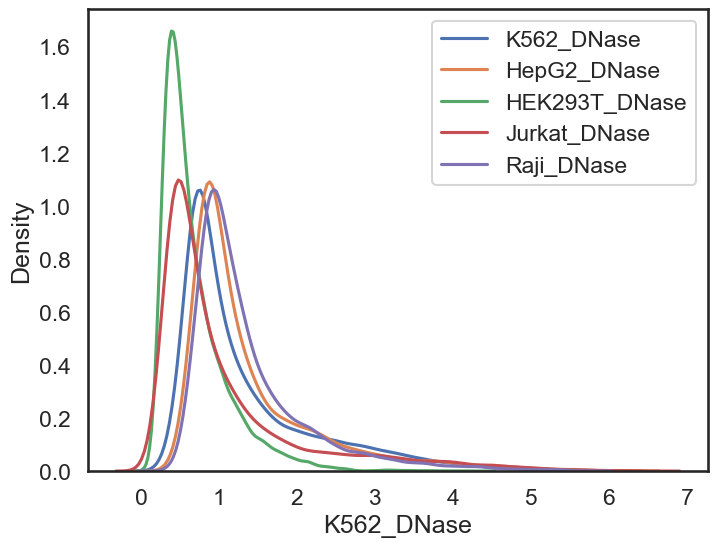

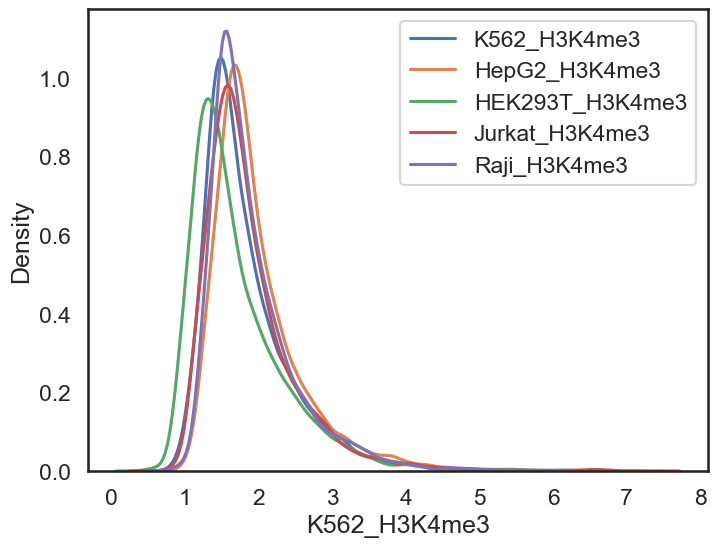

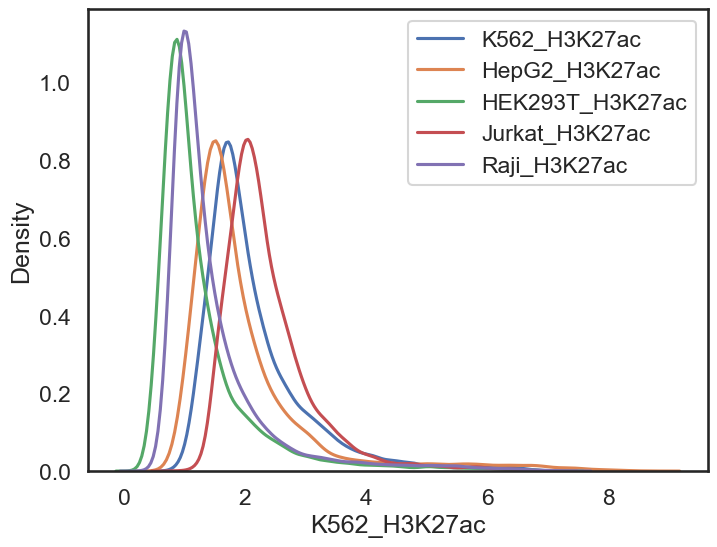

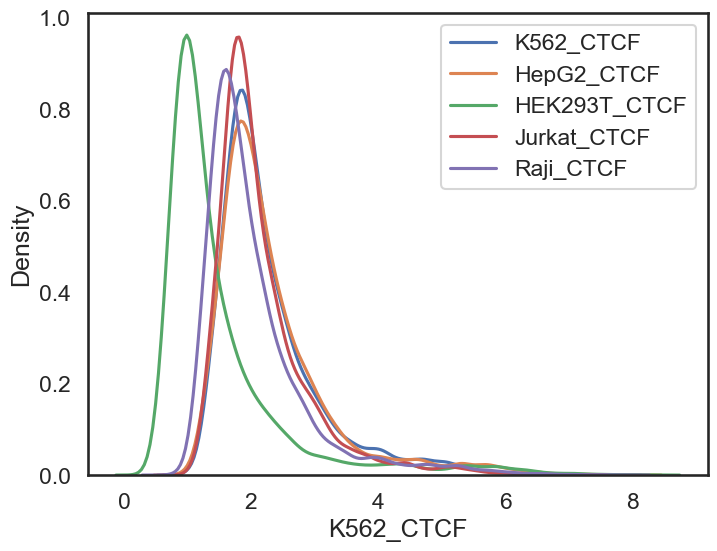

In [35]:
for a in assays:
    for c in cell_types:
        sns.kdeplot(VEF_df[f'{c}_{a}'], label=f'{c}_{a}')
    plt.legend()
    plt.show()

In [30]:
cell_types = ['K562', 'HepG2', 'HEK293T', 'Jurkat', 'Raji']

for j, assay in enumerate(assays):
    corr_df = pd.DataFrame()
    for c1 in cell_types:
        for c2 in cell_types:
            pred = VEF_df[f'{c1}_{assay}']
            true = MPRA_df[f'{c2}']
            r, _ = pearson(pred, true)
            corr_df.loc[f'{c1}_{assay}', f'{c2}'] = r
    print(assay, corr_df)

DNase                K562  HepG2  HEK293T  Jurkat  Raji
K562_DNase    0.565  0.542    0.523   0.439 0.487
HepG2_DNase   0.362  0.630    0.342   0.209 0.264
HEK293T_DNase 0.410  0.388    0.440   0.374 0.417
Jurkat_DNase  0.538  0.483    0.478   0.460 0.495
Raji_DNase    0.533  0.545    0.530   0.441 0.495
H3K4me3                  K562  HepG2  HEK293T  Jurkat  Raji
K562_H3K4me3    0.474  0.523    0.472   0.388 0.416
HepG2_H3K4me3   0.314  0.542    0.332   0.239 0.248
HEK293T_H3K4me3 0.457  0.531    0.463   0.377 0.393
Jurkat_H3K4me3  0.392  0.447    0.404   0.374 0.363
Raji_H3K4me3    0.412  0.505    0.444   0.347 0.390
H3K27ac                  K562  HepG2  HEK293T  Jurkat  Raji
K562_H3K27ac    0.469  0.543    0.457   0.355 0.385
HepG2_H3K27ac   0.220  0.550    0.210   0.103 0.133
HEK293T_H3K27ac 0.430  0.530    0.430   0.291 0.348
Jurkat_H3K27ac  0.423  0.491    0.436   0.401 0.391
Raji_H3K27ac    0.399  0.471    0.410   0.326 0.389
CTCF               K562  HepG2  HEK293T  Jurkat  Raji


In [36]:
cell_types = ['K562', 'HepG2', 'HEK293T', 'Jurkat', 'Raji']

for j, assay in enumerate(assays):
    corr_df = pd.DataFrame()
    for c1 in cell_types:
        for c2 in cell_types:
            pred = VEF_df[f'{c1}_{assay}']
            true = MPRA_df[f'{c2}']
            r, _ = spearman(pred, true)
            corr_df.loc[f'{c1}_{assay}', f'{c2}'] = r
    print(assay, corr_df)

DNase                K562  HepG2  HEK293T  Jurkat  Raji
K562_DNase    0.559  0.564    0.557   0.493 0.528
HepG2_DNase   0.448  0.589    0.457   0.358 0.397
HEK293T_DNase 0.445  0.427    0.475   0.425 0.462
Jurkat_DNase  0.530  0.502    0.520   0.498 0.555
Raji_DNase    0.501  0.536    0.522   0.473 0.491
H3K4me3                  K562  HepG2  HEK293T  Jurkat  Raji
K562_H3K4me3    0.425  0.465    0.429   0.388 0.408
HepG2_H3K4me3   0.334  0.462    0.360   0.302 0.300
HEK293T_H3K4me3 0.445  0.510    0.465   0.414 0.418
Jurkat_H3K4me3  0.343  0.393    0.389   0.366 0.347
Raji_H3K4me3    0.405  0.479    0.436   0.379 0.395
H3K27ac                  K562  HepG2  HEK293T  Jurkat  Raji
K562_H3K27ac    0.416  0.490    0.440   0.388 0.373
HepG2_H3K27ac   0.334  0.477    0.354   0.290 0.285
HEK293T_H3K27ac 0.432  0.521    0.450   0.380 0.386
Jurkat_H3K27ac  0.360  0.424    0.404   0.380 0.356
Raji_H3K27ac    0.394  0.471    0.422   0.374 0.383
CTCF               K562  HepG2  HEK293T  Jurkat  Raji


In [31]:
VEF_df.to_csv('../data/Zhang_MPRA/Zhang_MPRA_AlphaGenome_VEF_log1p.tsv', sep='\t', index=False)

In [22]:
MPRA_df = pd.read_csv('../data/Zhang_MPRA/Zhang_MPRA_Raji_merged.tsv', sep='\t')
VEF_df = pd.read_csv('../data/Zhang_MPRA/Zhang_MPRA_AlphaGenome_VEF_log1p.tsv', sep='\t')

In [23]:
cell_types = ['K562', 'HepG2', 'HEK293T', 'Jurkat', 'Raji']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']

In [25]:
pearson_df = pd.DataFrame()
for i, cell_type in enumerate(cell_types):
    for j, assay in enumerate(assays):
        pred = VEF_df[f'{cell_type}_{assay}']
        true = MPRA_df[cell_type]
        r, _ = pearson(pred, true)
        pearson_df.loc[cell_type, assay] = r
print(pearson_df)

         DNase  H3K4me3  H3K27ac  CTCF
K562     0.435    0.474    0.469 0.515
HepG2    0.504    0.542    0.550 0.502
HEK293T  0.340    0.463    0.430 0.395
Jurkat   0.335    0.374    0.401 0.360
Raji     0.373    0.390    0.389 0.400


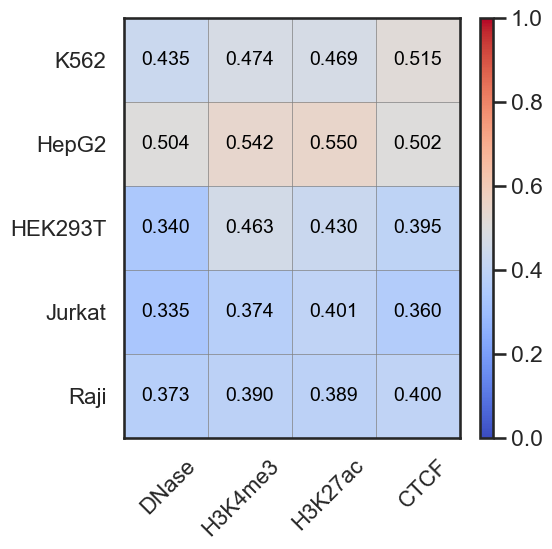

In [26]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
sns.set_style("white")

# 提取数据
data = pearson_df.values
row_labels = pearson_df.index.tolist()
col_labels = pearson_df.columns.tolist()

# 创建画布和坐标轴
fig, ax = plt.subplots(figsize=(9, 6), dpi=100)
plt.subplots_adjust(left=0.2, bottom=0.2, right=0.9, top=0.9)

# 绘制热图
im = ax.imshow(data, cmap='coolwarm', vmin=0.0, vmax=1.0)

# 设置 divider 来控制 colorbar 的轴
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.2)  # size 为 colorbar 宽度，pad 为间距

# 添加 colorbar
cbar = fig.colorbar(im, cax=cax)

# 添加文本注释（跳过 NaN）
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        val = data[i, j]
        if not np.isnan(val):
            ax.text(j, i, f'{val:.3f}', ha='center', va='center', color='black', fontsize=14)

# 设置坐标轴标签
ax.set_xticks(np.arange(len(col_labels))+0.4)
ax.set_yticks(np.arange(len(row_labels)))
ax.set_xticklabels(col_labels, rotation=45, ha='right', fontsize=16)
ax.set_yticklabels(row_labels, fontsize=16)

# 设置灰色网格线
ax.set_xticks(np.arange(data.shape[1]+1)-0.5, minor=True)
ax.set_yticks(np.arange(data.shape[0]+1)-0.5, minor=True)
ax.grid(which='minor', color='gray', linewidth=0.5)
ax.tick_params(which='minor', bottom=False, left=False)

plt.savefig('figures/Zhang_MPRA_AlphaGenome_pred_correlation_heatmap.png', dpi=400)